<a href="https://colab.research.google.com/github/anasabbad/Netflix-Movies-and-TV-Shows-Clustering/blob/main/NETFLIX_MOVIES_AND_TV_SHOWS_CLUSTERING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

## <b>In this  project, you are required to do </b>
1. Exploratory Data Analysis 

2. Understanding what type content is available in different countries

3. Is Netflix increasingly focusing on TV rather than movies in recent years.
4. Clustering similar content by matching text-based features



# **Attribute Information**

1. show_id : Unique ID for every Movie / Tv Show

2. type : Identifier - A Movie or TV Show

3. title : Title of the Movie / Tv Show

4. director : Director of the Movie

5. cast : Actors involved in the movie / show

6. country : Country where the movie / show was produced

7. date_added : Date it was added on Netflix

8. release_year : Actual Releaseyear of the movie / show

9. rating : TV Rating of the movie / show

10. duration : Total Duration - in minutes or number of seasons

11. listed_in : Genere

12. description: The Summary description

# Importing libraries

In [ ]:

import numpy as np
import pandas as pd
from numpy import math
import seaborn as sns
from datetime import datetime

import warnings
from pylab import rcParams
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
warnings.filterwarnings('ignore')

from wordcloud import WordCloud, STOPWORDS

from pylab import rcParams
rcParams['figure.figsize'] = 8, 8

# Loading data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Capstone Projects/Netflix_Clustering/Netflix_dataset.csv")

# A glimpse of data

In [ ]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [ ]:
data.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


In [ ]:
print(data.columns)

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')


# Data Preprocessing

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


**Checking for Null values**

In [ ]:
# Missing Value Count Function
def show_missing():
    missing = data.columns[data.isnull().any()].tolist()
    return missing

# Missing data counts and percentage
print('Missing Data Count')
print(data[show_missing()].isnull().sum().sort_values(ascending = False))
print('--'*50)
print('Missing Data Percentage')
print(round(data[show_missing()].isnull().sum().sort_values(ascending = False)/len(data)*100,2))

Missing Data Count
director      2389
cast           718
country        507
date_added      10
rating           7
dtype: int64
----------------------------------------------------------------------------------------------------
Missing Data Percentage
director      30.68
cast           9.22
country        6.51
date_added     0.13
rating         0.09
dtype: float64


In [ ]:
data.isnull().sum().sum()

3631

**The complete dataset has 3,631 null values, including 2389 missing values under "director," 718 missing  under "cast," 507 missing  under "country," 10 missing under "date added," and 7 missing points under "rating." Before beginning EDA and modelling, we must deal with all null data points.**

In [ ]:
data.nunique()

show_id         7787
type               2
title           7787
director        4049
cast            6831
country          681
date_added      1565
release_year      73
rating            14
duration         216
listed_in        492
description     7769
dtype: int64

**Imputation and dropping of null values**

In [ ]:
data.director.fillna("No Director", inplace=True)
data.cast.fillna("No Cast", inplace=True)
data['country'] = data['country'].fillna(data['country'].mode()[0])
data.dropna(subset=["date_added", "rating"], inplace=True)

In [ ]:
data.isnull().any()

show_id         False
type            False
title           False
director        False
cast            False
country         False
date_added      False
release_year    False
rating          False
duration        False
listed_in       False
description     False
dtype: bool

# Exploratory Data Analysis

**Descriptive statistics**

In [ ]:
data.describe(include='object')

,show_id,type,title,director,cast,country,date_added,rating,duration,listed_in,description
count,7770,7770,7770,7770,7770,7770,7770,7770,7770,7770,7770
unique,7770,2,7770,4048,6818,681,1563,14,216,491,7752
top,s1,Movie,3%,No Director,No Cast,United States,"January 1, 2020",TV-MA,1 Season,Documentaries,Multiple women report their husbands as missin...
freq,1,5372,1,2376,718,3051,118,2861,1606,334,3


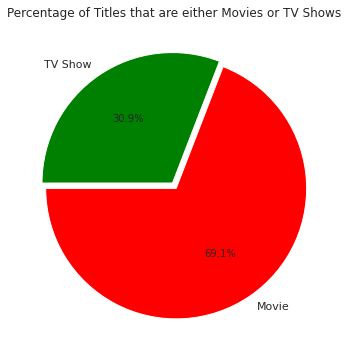

In [ ]:
plt.figure(figsize=(12,6))
plt.title("Percentage of Titles that are either Movies or TV Shows")
g = plt.pie(data.type.value_counts(),explode=(0.025,0.025), labels=data.type.value_counts().index, colors=['red','green'],autopct='%1.1f%%', startangle=180)
plt.show()

There are much more movie titles (69.1%) than TV show titles (30.90 percent ) on Netflix.

We'll now look at how much content Netflix has added over the past few years. We will add a "year added" column to show the year of the date from the "date added" columns since we are interested in when Netflix added the title to their platform. 

**Year-wise analysis**

In [ ]:
movies = data[data.type.str.contains("Movie")]
movies_after_2000 = movies[movies['release_year'] >= 2000]

In [ ]:
shows = data[data.type.str.contains("TV Show")]
shows_after_2000 = shows[shows['release_year'] >= 2000]

In [ ]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,No Director,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [ ]:
data.release_year.max()

2021

In [ ]:
all_releases_after_2000 = data[data['release_year'] >= 2000]
data_yearwise = all_releases_after_2000.release_year.value_counts().to_frame().reset_index().rename(columns={"index": "year", "release_year":"count"})
data_yearwise = data_yearwise[data_yearwise.year != 2021]


In [ ]:
movies_yearwise = movies_after_2000.release_year.value_counts().to_frame().reset_index().rename(columns={"index": "year", "release_year":"count"})
movies_yearwise = movies_yearwise[movies_yearwise.year != 2021]
movies_yearwise.head()

,year,count
0,2017,742
1,2018,734
2,2016,642
3,2019,582
4,2020,411


In [ ]:
shows_yearwise = shows_after_2000.release_year.value_counts().to_frame().reset_index().rename(columns={"index": "year", "release_year":"count"})
shows_yearwise = shows_yearwise[shows_yearwise.year != 2021]
shows_yearwise.head()

,year,count
0,2020,457
1,2019,414
2,2018,386
3,2017,268
4,2016,239


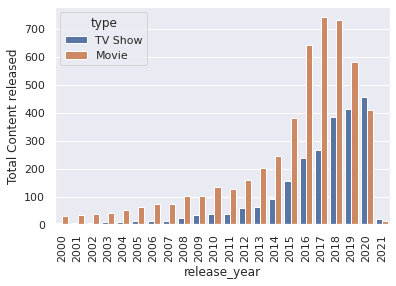

In [ ]:
ax=sns.countplot(x="release_year", hue="type", data=all_releases_after_2000)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
plt.ylabel("Total Content released")
plt.show()

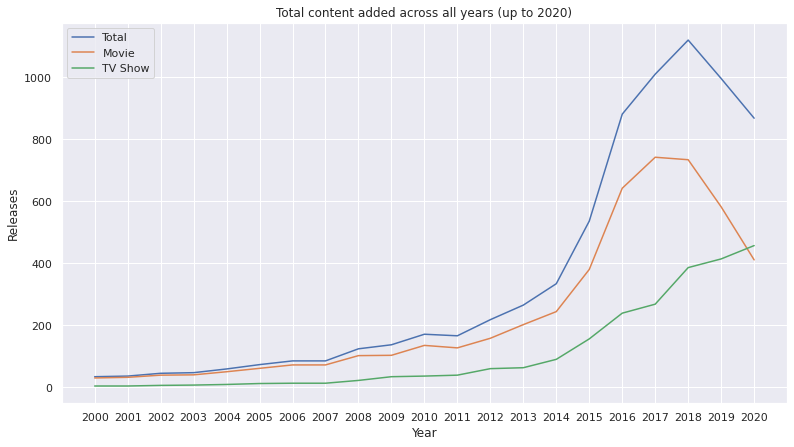

In [ ]:
fig, ax = plt.subplots(figsize=(13, 7))
sns.lineplot(data=data_yearwise, x='year', y='count')
sns.lineplot(data=movies_yearwise, x='year', y='count')
sns.lineplot(data=shows_yearwise, x='year', y='count')
ax.set_xticks(np.arange(2000, 2021, 1))
plt.title("Total content added across all years (up to 2020)")
plt.legend(['Total','Movie','TV Show'])
plt.ylabel("Releases")
plt.xlabel("Year")
plt.show()

From these charts we can see that Netflix is increasingly focusing on TV shows rather than movies in recent years. For the the first time in the history of Netflix, in 2020, the number of TV shows released were more than movies.

**Country-wise analysis** 

In [ ]:
top10countries_content = (data.groupby(["country"]).size().sort_values(ascending=False)[0:10])
top10countries_movies = (movies.groupby(["country"]).size().sort_values(ascending=False)[0:10])
top10countries_shows = (shows.groupby(["country"]).size().sort_values(ascending=False)[0:10])
top10countries_content

country
United States     3051
India              923
United Kingdom     396
Japan              224
South Korea        183
Canada             177
Spain              134
France             115
Egypt              101
Mexico             100
dtype: int64

Text(0, 0.5, 'Total Content released')

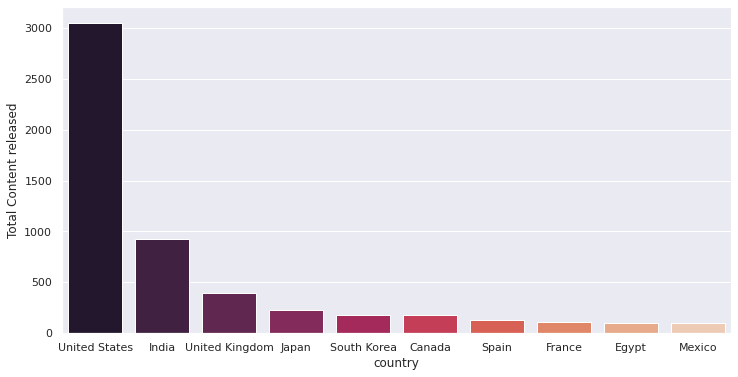

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x=top10countries_content.index, y=top10countries_content, palette="rocket")
plt.ylabel("Total Content released")

Text(0, 0.5, 'Movies released')

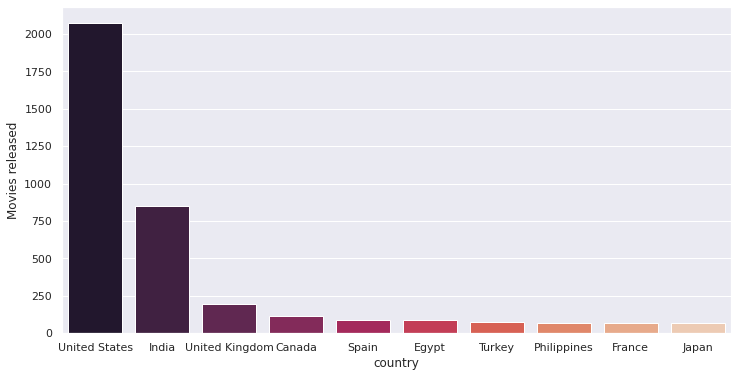

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x=top10countries_movies.index, y=top10countries_movies, palette="rocket")
plt.ylabel("Movies released")

Text(0, 0.5, 'Shows released')

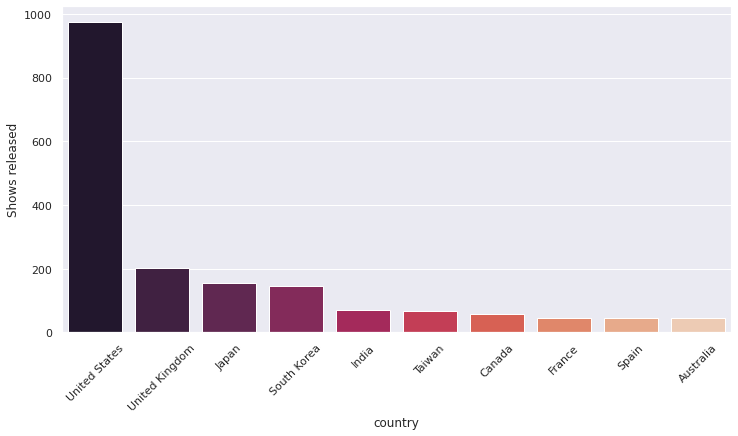

In [ ]:
plt.figure(figsize=(12, 6))
ax=sns.barplot(x=top10countries_shows.index, y=top10countries_shows, palette="rocket")
ax.set_xticklabels(ax.get_xticklabels(),rotation = 45)
plt.ylabel("Shows released")



*   A lion's share of all thge content released on Netflix are from United States followed by India
*   Comparing India ad UK. India released more movies and UK released more TV Shows



In [ ]:
# filtered_genres = data.set_index('title').listed_in.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
# filtered_genres


**Top Directors**

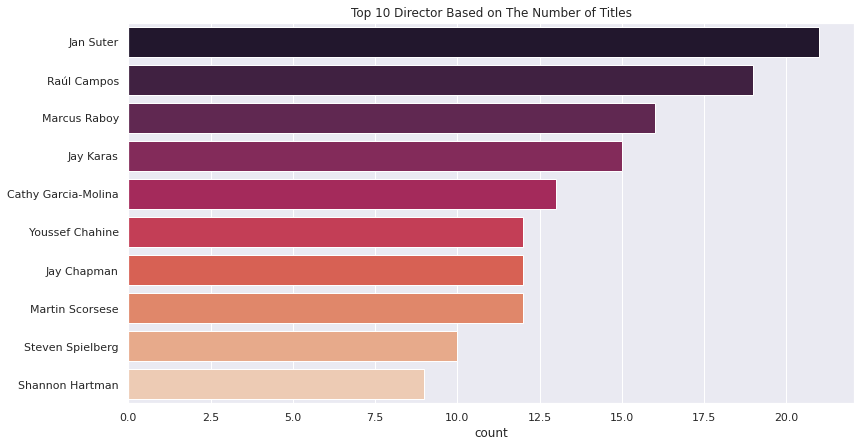

In [ ]:
filtered_directors = data[data.director != 'No Director'].set_index('title').director.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
plt.figure(figsize=(13,7))
plt.title('Top 10 Director Based on The Number of Titles')
sns.countplot(y = filtered_directors, order=filtered_directors.value_counts().index[:10], palette='rocket')
plt.show()

**Top Movie Directors** 

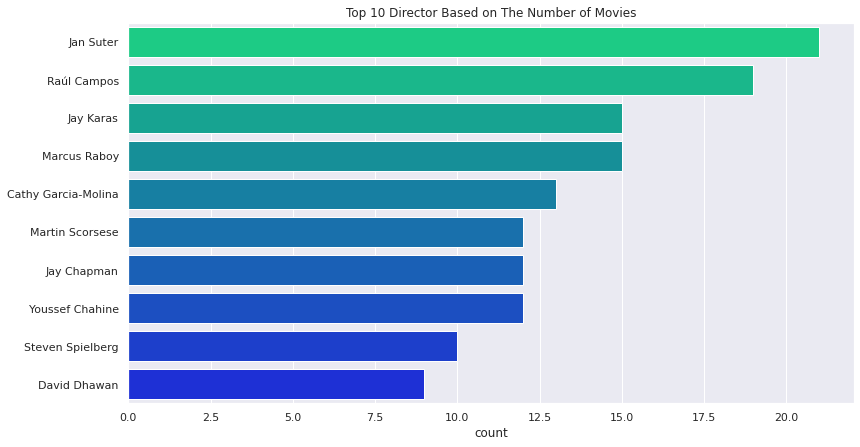

In [ ]:
filtered_directors = movies[movies.director != 'No Director'].set_index('title').director.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
plt.figure(figsize=(13,7))
plt.title('Top 10 Director Based on The Number of Movies')
sns.countplot(y = filtered_directors, order=filtered_directors.value_counts().index[:10], palette='winter_r')
plt.show()

**Top Shows Directors**

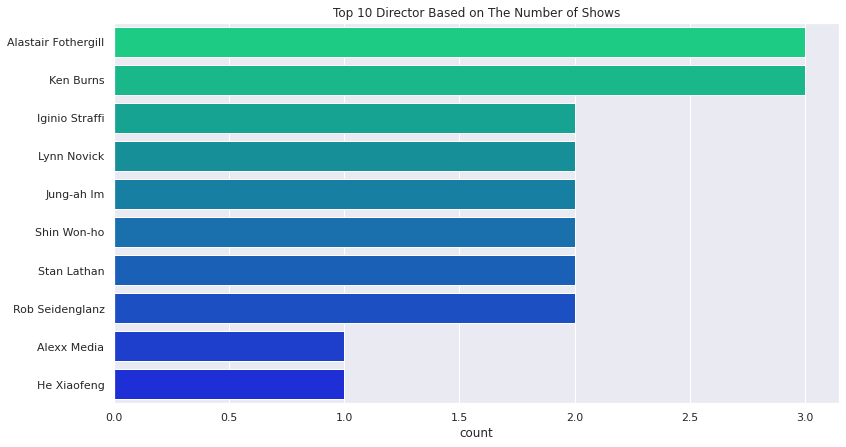

In [ ]:
filtered_directors = shows[shows.director != 'No Director'].set_index('title').director.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
plt.figure(figsize=(13,7))
plt.title('Top 10 Director Based on The Number of Shows')
sns.countplot(y = filtered_directors, order=filtered_directors.value_counts().index[:10], palette='winter_r')
plt.show()

In [ ]:
restricted = ['No Director']
Only_Director= data[~data.director.isin(restricted)]

<Figure size 720x432 with 0 Axes>

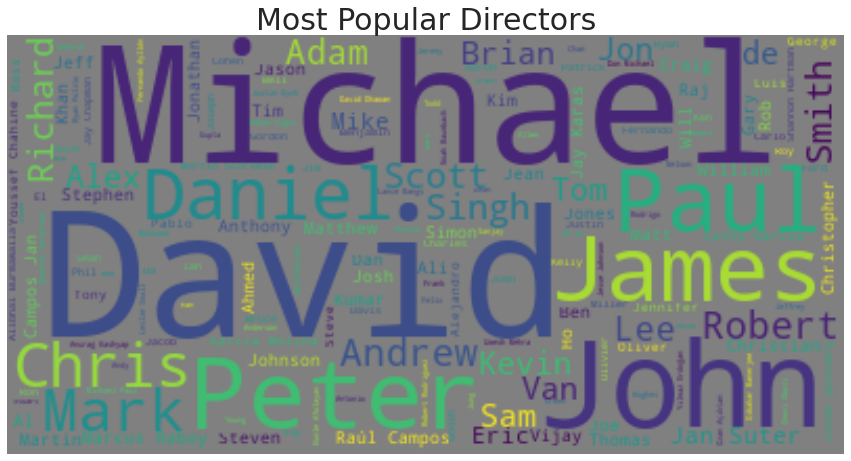

In [ ]:
from wordcloud import WordCloud, ImageColorGenerator

text = " ".join(str(each) for each in Only_Director.director)
# Create and generate a word cloud image:
wordcloud = WordCloud(max_words=200, background_color="gray").generate(text)
plt.figure(figsize=(10,6))
plt.figure(figsize=(15,10))
# Display the generated image:
plt.imshow(wordcloud, interpolation='Bilinear')
plt.title('Most Popular Directors',fontsize = 30)
plt.axis("off")
plt.show()



*   Jan Sutor is the number 1 director in terms of the Number of movies directed
*   Alastair Fothergill is the number 1 director in terms of the Number of TV shows directed




**Targetted Age groups of Contents**

In [ ]:
rating_ages = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}

In [ ]:
# creating new feature
data['targeted_age'] = data['rating'].replace(rating_ages)

In [ ]:
data['targeted_age'].value_counts()

Adults        3617
Teens         2314
Older Kids    1327
Kids           512
Name: targeted_age, dtype: int64

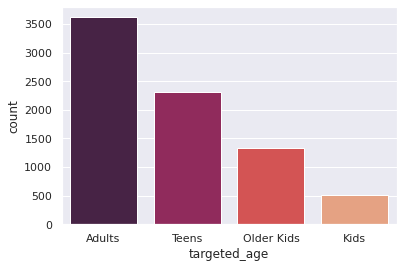

In [ ]:
sns.countplot(x=data['targeted_age'],palette='rocket')
plt.show()

* Most of the contents are listed in Adults category with more than 3500 titles
* Contents catering to kids is the least
* Teens and older kids have a fair amount of titles to enjoy

**Top Genres**

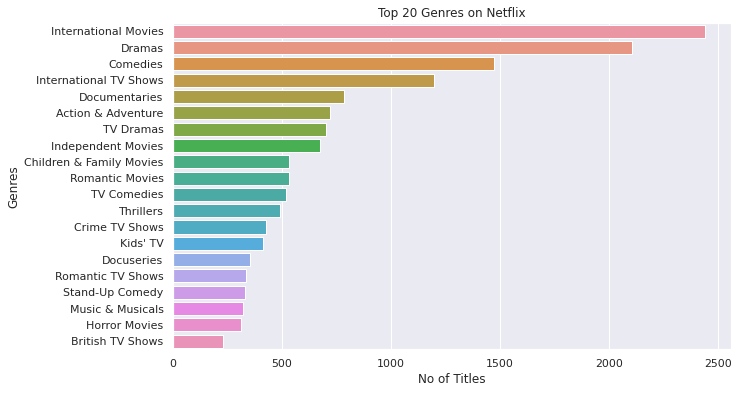

In [ ]:
genres = data.set_index('title').listed_in.str.split(', ', expand=True).stack().reset_index(level=1, drop=True);

plt.figure(figsize=(10,6))
g = sns.countplot(y = genres, order=genres.value_counts().index[:20])
plt.title('Top 20 Genres on Netflix')
plt.xlabel('No of Titles')
plt.ylabel('Genres')
plt.show()

<Figure size 720x432 with 0 Axes>

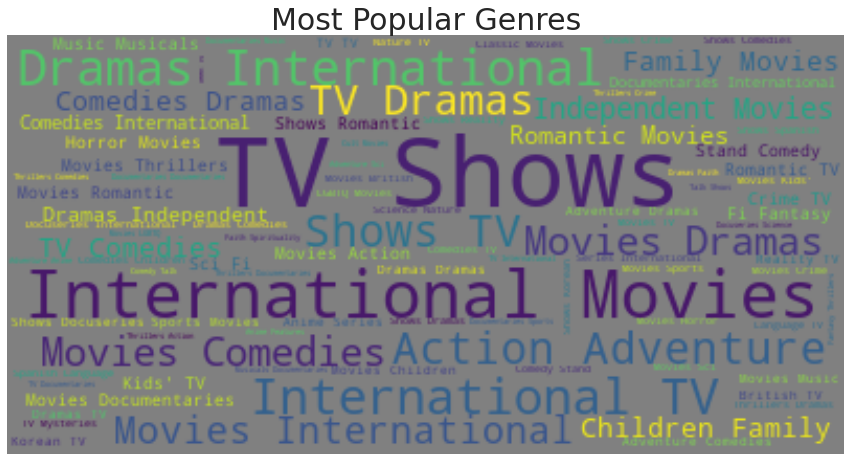

In [ ]:
text = " ".join(str(each) for each in genres)
# Create and generate a word cloud image:
wordcloud = WordCloud(max_words=200, background_color="grey").generate(text)
plt.figure(figsize=(10,6))
plt.figure(figsize=(15,10))
# Display the generated image:
plt.imshow(wordcloud, interpolation='Bilinear')
plt.title('Most Popular Genres',fontsize = 30)
plt.axis("off")
plt.show()

The top genre is the International movies followed by Dramas and Comedies

**Duration**
 
 There are two different type of durations. For Movies it's in miniutes and for TV Shows it's in season

**Movie Duration**

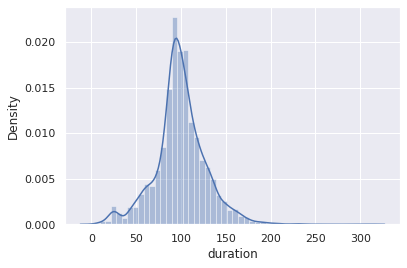

In [ ]:
# we are removing excess part in duration and converting it into numeric
movies['duration'] = movies['duration'].apply(lambda x: x.split(' ')[0])
movies['duration'] = movies['duration'].astype('int')

sns.distplot(movies['duration'])
plt.show()

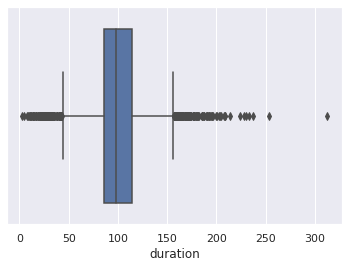

In [ ]:
sns.boxplot(movies['duration'])
plt.show()

* The average movie time is 100 mins
*  maximum movies are in the range of 87 to 114 minutes
*  we can see that there are sevral movies which are less than 50 mins so we can consider them outlier

**Shows Duration**

In [ ]:
# we are removing excess part in duration and converting it into numeric
shows['duration'] = shows['duration'].apply(lambda x: x.split(' ')[0])
shows['duration'] = shows['duration'].astype('int')

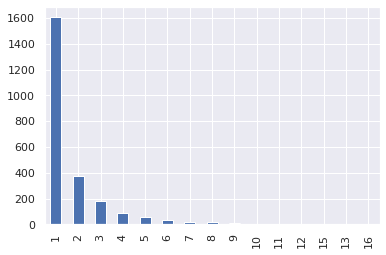

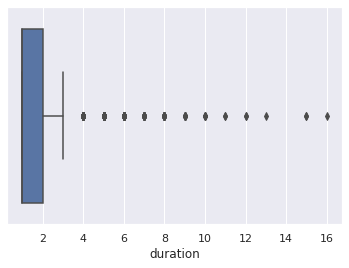

In [ ]:
shows['duration'].value_counts().plot(kind='bar')
plt.show()
sns.boxplot(shows['duration'])
plt.show()



*   Most of the shows have only one season
*   There are also shows with more than 10 seasons



# Text Preprocessing

This method entails transforming the show's or movie's "Description" into a format that a computer can understand. Here, we lowercase everything, get rid of punctuation, and get rid of unnecessary words (so that only words that provide context are retained). Here, comparable words are combined to conserve memory and processing time. To extract context-related information, both single words and groups of words are collected.

In [ ]:
from IPython.display import display
from tqdm import tqdm
from collections import Counter
import ast

from sklearn.feature_extraction.text import CountVectorizer
from textblob import TextBlob
import scipy.stats as stats

from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.manifold import TSNE

%matplotlib inline

In [ ]:
#Creating a dataframe with title, genres and description
a = data.copy()

In [ ]:
a['listed_in'] = a.listed_in.apply(lambda row: row.split(', '))
a.explode('listed_in')['listed_in'].unique()

array(['International TV Shows', 'TV Dramas', 'TV Sci-Fi & Fantasy',
       'Dramas', 'International Movies', 'Horror Movies',
       'Action & Adventure', 'Independent Movies', 'Sci-Fi & Fantasy',
       'TV Mysteries', 'Thrillers', 'Crime TV Shows', 'Docuseries',
       'Documentaries', 'Sports Movies', 'Comedies', 'Anime Series',
       'Reality TV', 'TV Comedies', 'Romantic Movies',
       'Romantic TV Shows', 'Science & Nature TV', 'Movies',
       'British TV Shows', 'Korean TV Shows', 'Music & Musicals',
       'LGBTQ Movies', 'Faith & Spirituality', "Kids' TV",
       'TV Action & Adventure', 'Spanish-Language TV Shows',
       'Children & Family Movies', 'TV Shows', 'Classic Movies',
       'Cult Movies', 'TV Horror', 'Stand-Up Comedy & Talk Shows',
       'Teen TV Shows', 'Stand-Up Comedy', 'Anime Features',
       'TV Thrillers', 'Classic & Cult TV'], dtype=object)

In [ ]:
replacing_genre = {'International TV Shows': '-',
                   'TV Dramas': 'Drama',
                   'TV Sci-Fi & Fantasy': 'SciFiFantasy',
                   'Dramas': 'Drama' ,
                   'International Movies': '-',
                   'Horror Movies': 'Horror',
                   'Action & Adventure': 'Action & Adventure',
                   'Independent Movies': '-',
                   'Sci-Fi & Fantasy': 'SciFiFantasy',
                  'TV Mysteries': 'Mystery'       ,
                  'Thrillers': 'Thriller',
                   'Crime TV Shows': 'Crime',
                   'Docuseries': 'Documentary',
                  'Documentaries': 'Documentary', 'Sports Movies': 'Sports',
                   'Comedies':'Comedy',
                   'Anime Series': 'Anime',
                  'Reality TV': 'Reality',
                   'TV Comedies': 'Comedy',
                   'Romantic Movies': 'Romance',
                  'Romantic TV Shows': 'Romance', 
                   'Science & Nature TV': 'Science',
                   'Movies': '-',
                  'British TV Shows': '-',
                   'Korean TV Shows': '-',
                   'Music & Musicals': 'Music',
                  'LGBTQ Movies': 'LGBTQ',
                   'Faith & Spirituality': 'Spirituality', 
                   "Kids' TV": 'Kids',
                  'TV Action & Adventure': 'Action & Adventure',
                   'Spanish-Language TV Shows': '-',
                  'Children & Family Movies': 'Family', 
                   'TV Shows': '-',
                   'Classic Movies': 'Classic',
                  'Cult Movies': 'Cult',
                   'TV Horror': 'Horror',
                   'Stand-Up Comedy & Talk Shows':'Comedy, TalkShow',
                  'Teen TV Shows': 'Teen', 'Stand-Up Comedy':'Comedy', 
                   'Anime Features':'Anime',
                  'TV Thrillers': 'Thriller',
                   'Classic & Cult TV':'Classic, Cult'}

In [ ]:
def genre_replace(row, replacing_genre = replacing_genre):
  new_text = []
 
  for word in (row['listed_in']):
    if word in replacing_genre:
      if '-' not in replacing_genre[word]:
       new_text.append(replacing_genre[word])
    else:
      print(word, 'not present in dictionary')

  return(', '.join(new_text))
  

a['Genres'] = a.apply(lambda row: genre_replace(row),axis=1)
a['Genres'] = a['Genres'].apply(lambda row: row.split(', '))


In [ ]:
(a.explode('Genres')['Genres'].unique())

array(['Drama', 'SciFiFantasy', 'Horror', 'Action & Adventure', 'Mystery',
       'Thriller', 'Crime', 'Documentary', 'Sports', 'Comedy', 'Anime',
       'Reality', 'Romance', 'Science', '', 'Music', 'LGBTQ',
       'Spirituality', 'Kids', 'Family', 'Classic', 'Cult', 'TalkShow',
       'Teen'], dtype=object)

In [ ]:
a.explode('Genres')['Genres']

0                    Drama
0             SciFiFantasy
1                    Drama
2                   Horror
3       Action & Adventure
               ...        
7784           Documentary
7784                 Music
7785               Reality
7786           Documentary
7786                 Music
Name: Genres, Length: 12291, dtype: object